In [2]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
# Read in buoy data
buoy_file = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW8_buoy_data.xlsx" #note on path
buoy_all = pd.read_excel(buoy_file)
buoy = buoy_all.loc[:,['WVHT','DPD','APD','MWD','WTMP']]
buoy = buoy.rename(columns={'WVHT':'height','DPD':'dom pd','APD':'avg pd','MWD':'dir','WTMP':'temp'})
buoy[(buoy['height']==99)|(buoy['dom pd']==99)|(buoy['avg pd']==99)|(buoy['dir']==99)|(buoy['temp']==99)] #See rows with no data
buoy= buoy.drop(buoy[buoy['height']==99].index)
buoy

,height,dom pd,avg pd,dir,temp
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5
...,...,...,...,...,...
17280,2.01,14.29,11.19,270,16.7
17281,1.75,15.38,10.37,267,16.7
17282,1.79,13.33,10.50,268,16.8
17283,1.66,14.29,10.32,271,16.8


In [20]:
buoy.shape

(17276, 5)

In [6]:
# Print out column names
print(buoy.columns)

Index(['height', 'dom pd', 'avg pd', 'dir', 'temp'], dtype='object')


In [7]:
# Convert to numpy
buoy_np = buoy.to_numpy()

In [8]:
# Fit PCA to buoy data
pca = PCA(n_components=5)
pca.fit(buoy_np)

PCA(n_components=5)

In [10]:
# Explore PCA
print(pca.explained_variance_ratio_)
print(pca.components_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]
[[-0.00414966  0.03483275 -0.00632252 -0.99911854  0.02217264]
 [-0.02817253 -0.92292703 -0.35324348 -0.02653793  0.14807698]
 [ 0.03730158 -0.14552072 -0.03477188 -0.02692689 -0.98767311]
 [ 0.12786551 -0.35382026  0.92602029 -0.01817485  0.02485407]
 [ 0.99068062  0.02504633 -0.12828252 -0.00158002  0.03828429]]


In [12]:
buoy_plot = pca.transform(buoy_np)

In [18]:
# Turn plot data into dataframe
buoy_plot= pd.DataFrame({'Comp 1':buoy_plot[:,0], 'Comp 2':buoy_plot[:,1], 'Comp 3':buoy_plot[:,2], 'Comp 4':buoy_plot[:,3], 'Comp 5': buoy_plot[:,4]})

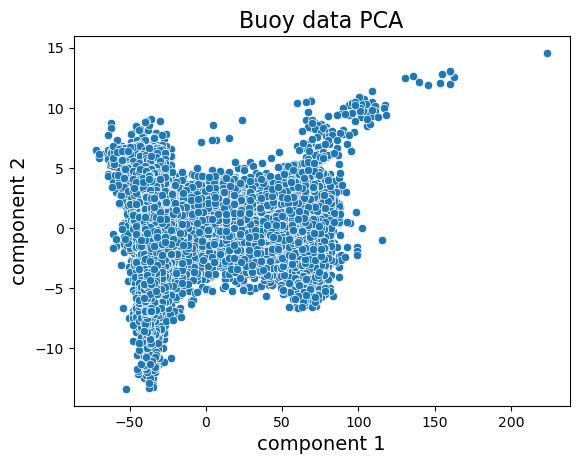

In [23]:
### 1.) Make PCA plot
plot= sns.scatterplot(data=buoy_plot, x='Comp 1', y='Comp 2')
plot.set_title("Buoy data PCA", fontsize= 16)
plot.set_xlabel("component 1", fontsize= 14)
plot.set_ylabel("component 2", fontsize= 14)
plt.show()

In [28]:
# Make table of amount of variance explained by each component
comp_list= [1,2,3,4,5]
variance= pd.DataFrame(data= {"component #":comp_list,"variance (%)": pca.explained_variance_ratio_*100})
variance
### 2.) Likely only component 1 is needed to capture most of the variability in the dataset as this component is responsible for about 99% of the variance.

,component #,variance (%)
0,1,99.077752
1,2,0.567156
2,3,0.248888
3,4,0.097314
4,5,0.008889


In [29]:
print(pca.components_) # columns are features, rows are components

[[-0.00414966  0.03483275 -0.00632252 -0.99911854  0.02217264]
 [-0.02817253 -0.92292703 -0.35324348 -0.02653793  0.14807698]
 [ 0.03730158 -0.14552072 -0.03477188 -0.02692689 -0.98767311]
 [ 0.12786551 -0.35382026  0.92602029 -0.01817485  0.02485407]
 [ 0.99068062  0.02504633 -0.12828252 -0.00158002  0.03828429]]


In [45]:
# Make table of which variables contribute to component 1
contrib= pd.DataFrame(data= {"variable": buoy.columns, "loading 1 (%)":abs(pca.components_[0,:]*100), "loading 2 (%)":abs(pca.components_[1,:]*100)})
contrib
### 3.) The variable most responsible for component 1 is mean wave direction at 99.9% of the contribution.

,variable,loading 1 (%),loading 2 (%)
0,height,0.414966,2.817253
1,dom pd,3.483275,92.292703
2,avg pd,0.632252,35.324348
3,dir,99.911854,2.653793
4,temp,2.217264,14.807698


In [ ]:
### 4.) I would imagine general bad performance on a linear dimensionality reduction method would imply a lot of information is being lost during the reduction process and/or the dataset is extremely complex so such a method isn't informative. Good performance would perhaps mean that despite being a large dataset with many features, the complexity can reasonably be simplified down to a few key features/processes that govern most of the patterns in the dataset. 